# Week 4- Implementing Convential CNN Architectures and Transfer Learning
# August 24, 2023.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [17]:
import os
import zipfile
local_zip = '/content/drive/MyDrive/horse_zebra.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
from IPython.testing import test
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
base_dir = '/tmp/horse_zebra'
train_dir = os.path.join(base_dir, 'train')
test_dir= os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with our training horse pictures
train_horse_dir = os.path.join(train_dir, 'horse')
# Directory with our training zebra pictures
train_zebra_dir = os.path.join(train_dir, 'zebra')
validation_horse_dir = os.path.join(validation_dir, 'horse')
validation_zebra_dir = os.path.join(validation_dir, 'zebra')
test_horse_dir = os.path.join(test_dir, 'horse')
test_zebra_dir = os.path.join(test_dir, 'zebra')

In [21]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
  validation_dir,
  target_size=(224, 224),
  batch_size=20,
  class_mode='categorical')

Found 2401 images belonging to 2 classes.
Found 260 images belonging to 2 classes.
Found 360 images belonging to 2 classes.


In [22]:
train_horse_fnames = os.listdir(train_horse_dir)
print(train_horse_fnames[:10])

train_zebra_fnames = os.listdir(train_zebra_dir)
train_zebra_fnames.sort()
print(train_zebra_fnames[:10])

['n02381460_2083.jpg', 'n02381460_1526.jpg', 'n02381460_2732.jpg', 'n02381460_1297.jpg', 'n02381460_852.jpg', 'n02381460_1038.jpg', 'n02381460_1402.jpg', 'n02381460_5396.jpg', 'n02381460_3902.jpg', 'n02381460_2605.jpg']
['n02391049_10007.jpg', 'n02391049_10027.jpg', 'n02391049_1004.jpg', 'n02391049_10047.jpg', 'n02391049_10063.jpg', 'n02391049_101.jpg', 'n02391049_1012.jpg', 'n02391049_10122.jpg', 'n02391049_10123.jpg', 'n02391049_10129.jpg']


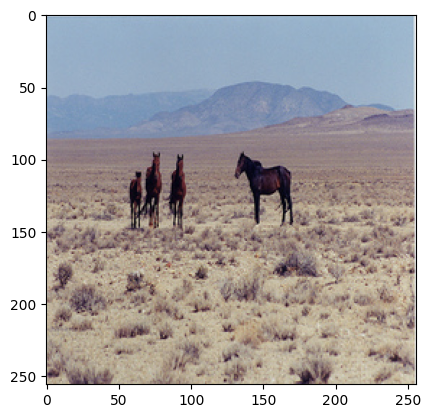

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_horse_dir, train_horse_fnames[0])))

In [24]:
im = mpimg.imread(os.path.join(train_horse_dir, train_horse_fnames[0]))

## Q1. A) Implement the LeNet-5, AlexNet architecture.
## B) Train, test and compare the performances of these two models on the Cats_and_Dogs_Dataset, Horse2Zebra Dataset

In [26]:
def LeNet5():
    model = tf.keras.Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model
model = LeNet5()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history=model.fit(train_generator,validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 6)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 44944)             0         
                                                                 
 dense_9 (Dense)             (None, 120)              

[0.3057473301887512, 0.8769230842590332]

In [27]:
def AlexNet():
    model = tf.keras.Sequential([
        Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Conv2D(256, (5, 5), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

model = AlexNet()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history2=model.fit(train_generator, validation_data=validation_generator, epochs=30)
model.evaluate(test_generator, batch_size=32)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 384)       885120    
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 384)      

[0.24712638556957245, 0.892307698726654]

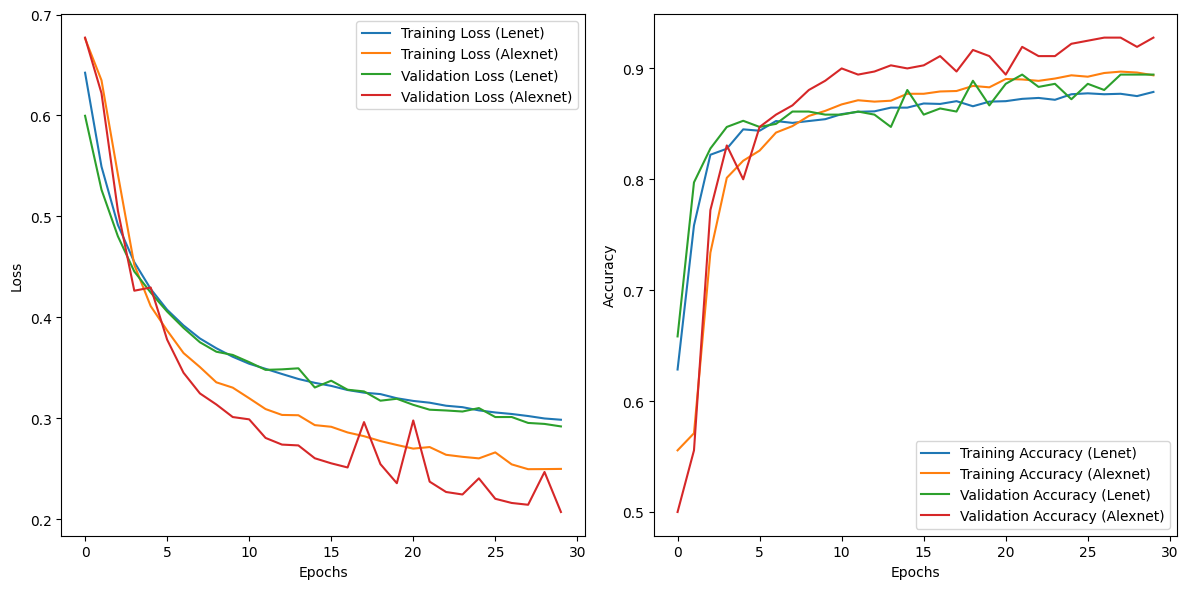

In [28]:
import matplotlib.pyplot as plt

# Plot training and validation loss for horse_zebra dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (Lenet)')
plt.plot(history2.history['loss'], label='Training Loss (Alexnet)')
plt.plot(history.history['val_loss'], label='Validation Loss (Lenet)')
plt.plot(history2.history['val_loss'], label='Validation Loss (Alexnet)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy (Lenet)')
plt.plot(history2.history['accuracy'], label='Training Accuracy (Alexnet)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Lenet)')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy (Alexnet)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

model = AlexNet()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history_cat_alex=model.fit(train_generator,validation_data=validation_generator, epochs=20)

model = LeNet5()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history_cat_Lenet5=model.fit(train_generator,validation_data=validation_generator, epochs=20)

--2023-09-01 18:15:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  19.9MB/s    in 4.1s    

2023-09-01 18:15:55 (15.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 10s 66ms/step - loss: 0.6928 - accuracy: 0.5010 - val_loss: 0.6909 - val_accuracy: 0.5280
Epoch 2/20
100/100 [==============================] - 8s 77ms/step - loss: 0.6899 - accuracy: 0.5275 - val_loss: 0.6895 - val_accuracy: 0.6040
Epoch 3/20
10

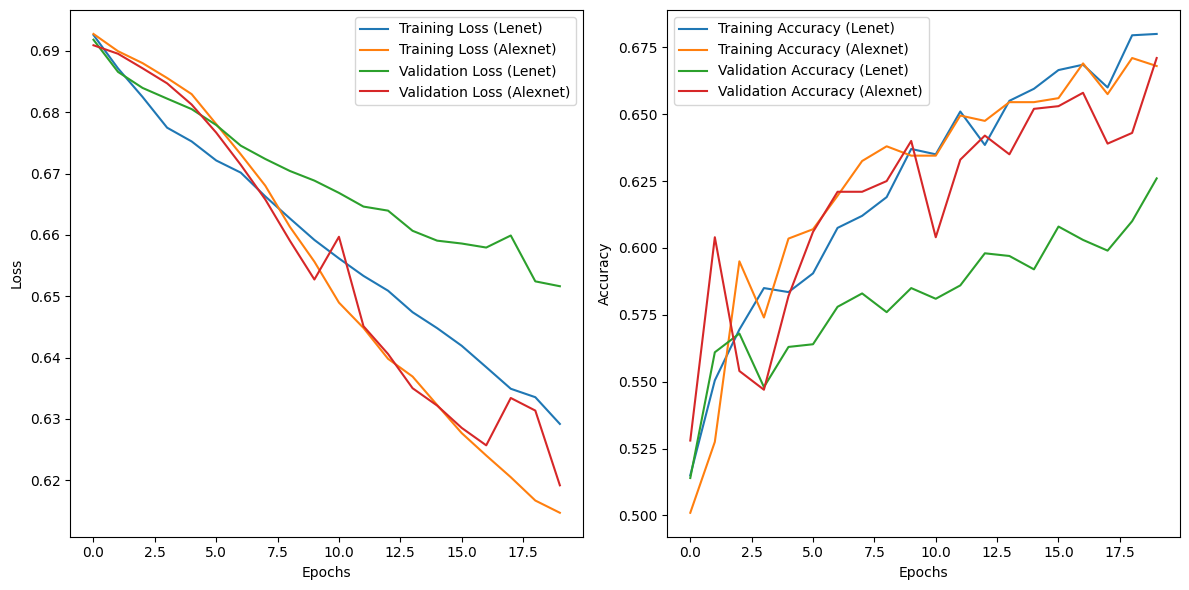

In [37]:
# Plot training and validation loss for cat_dogs dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cat_Lenet5.history['loss'], label='Training Loss (Lenet)')
plt.plot(history_cat_alex.history['loss'], label='Training Loss (Alexnet)')
plt.plot(history_cat_Lenet5.history['val_loss'], label='Validation Loss (Lenet)')
plt.plot(history_cat_alex.history['val_loss'], label='Validation Loss (Alexnet)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_cat_Lenet5.history['accuracy'], label='Training Accuracy (Lenet)')
plt.plot(history_cat_alex.history['accuracy'], label='Training Accuracy (Alexnet)')
plt.plot(history_cat_Lenet5.history['val_accuracy'], label='Validation Accuracy (Lenet)')
plt.plot(history_cat_alex.history['val_accuracy'], label='Validation Accuracy (Alexnet)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Q2. Train, test and report the performances using the following models on the Cats_and_Dogs_Dataset and Horse2Zebra dataset.
### A) VGG-16

In [29]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers

model=Sequential([
    base_model,
    Flatten(),
    Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history1=model.fit(train_generator, validation_data=validation_generator, epochs=20)
model.evaluate(test_generator, batch_size=32)

58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_15 (Dense)            (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
121/121 [==============================] - 21s 138ms/step - loss: 0.7505 - accuracy: 0.4723 - val_loss: 0.7161 - val_accuracy: 0.5056
Epoch 2/20
121/121 [==============================] - 16s 132ms/step - loss: 0.6978 - accur

[0.3636956214904785, 0.9307692050933838]

### B) GoogleNet

In [30]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
    base_model,
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(2, activation='softmax'),
    ])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history2=model.fit(train_generator, validation_data=validation_generator, epochs=20)
model.evaluate(test_generator, batch_size=32)

87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_13[0][0]']              
 alization)           

[0.049253493547439575, 0.9884615540504456]

### C) Resnet

In [31]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
  base_model,
  MaxPooling2D(),
  Flatten(),
  Dense(1024, activation='relu'),
  Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history3=model.fit(train_generator, validation_data=validation_generator, epochs=20)
model.evaluate(test_generator, batch_size=32)

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

[0.3722997009754181, 0.8461538553237915]

### D) EfficientNetB0

In [32]:
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
  base_model,
  MaxPooling2D(),
  Flatten(),
  Dense(1024, activation='relu'),
  Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history5=model.fit(train_generator, validation_data=validation_generator, epochs=20)
model.evaluate(test_generator, batch_size=32)

16705208/16705208 [==============================] - 2s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescal

[0.6452664136886597, 0.7730769515037537]

### E) MobileNetV2

In [33]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False
base_model.summary()
model=Sequential([
  base_model,
  MaxPooling2D(),
  Flatten(),
  Dense(1024, activation='relu'),
  Dense(2, activation='softmax'),
])
model.summary()
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])
history4=model.fit(train_generator, validation_data=validation_generator, epochs=20)
model.evaluate(test_generator, batch_size=32)

9406464/9406464 [==============================] - 2s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

[0.08400484174489975, 0.9769230484962463]

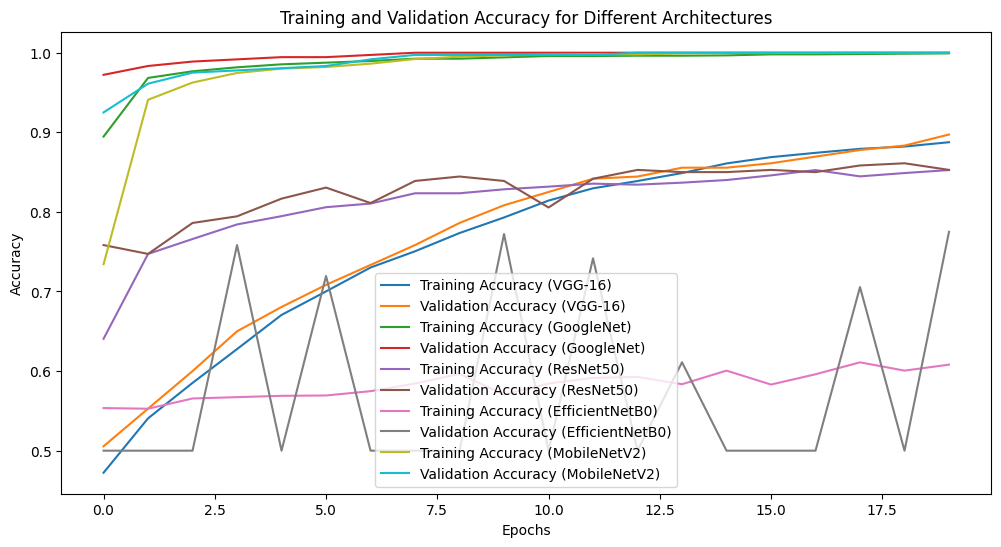

In [34]:
# Create a dictionary with history names and their respective histories
histories = {
    'VGG-16': history1,
    'GoogleNet': history2,
    'ResNet50': history3,
    'EfficientNetB0': history5,
    'MobileNetV2': history4
}

# Plot training and validation accuracy for each history
plt.figure(figsize=(12, 6))

for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'Training Accuracy ({name})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({name})')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for Different Architectures')
plt.show()